# **Bioinformatics Project - Computational Drug Discovery Regression Models with Random Forest**

Sanket Palve

Thanks to Chanin Nantasenamat

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [5]:
df = pd.read_csv('mycobacterium_tuberculosis_bioactivity_data_3class_pIC50_pubchem_fp (1).csv')
df


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.832683
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.204120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.744727
1811,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.886057
1812,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.920819
1813,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.958607


## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [6]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1811,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1812,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1813,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [7]:
Y = df.pIC50
Y

,pIC50
0,8.000000
1,6.832683
2,8.000000
3,8.000000
4,7.204120
...,...
1810,8.744727
1811,10.886057
1812,10.920819
1813,10.958607


### **3.3. Let's examine the data dimension**

In [8]:
X.shape

(1815, 881)

In [9]:
Y.shape

(1815,)

### **3.4. Remove low variance features**

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [11]:
X.shape

(1815, 168)

## **4. Data split (80/20 ratio)**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((1452, 168), (1452,))

In [14]:
X_test.shape, Y_test.shape

((363, 168), (363,))

## **5. Building a Regression Model using Random Forest**

In [15]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.648475155247891

In [16]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

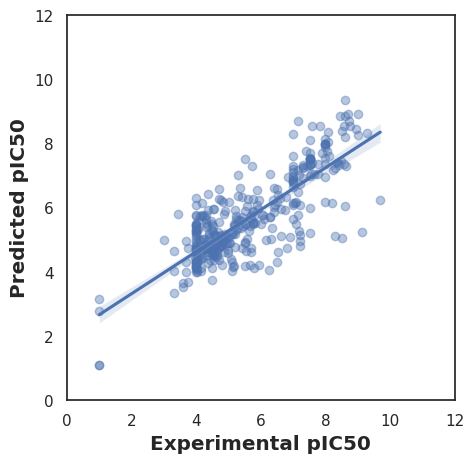

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # import pandas

sns.set(color_codes=True)
sns.set_style("white")

# Create a DataFrame with your test and predicted values
data = pd.DataFrame({'Experimental pIC50': Y_test, 'Predicted pIC50': Y_pred})

# Use the DataFrame in the regplot function, specifying 'x' and 'y'
ax = sns.regplot(x='Experimental pIC50', y='Predicted pIC50', data=data, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show